# Проект: Анализ оттока клиентов банка «Метанпром» #

## Описание проекта: ##

Проанализируйте клиентов банка «Метанпром» и выделите портреты клиентов, которые склонны уходить из банка.<br>
Банк расположен в Ярославле, Ростов Великий и Рыбинск.

<b>Заказчик</b>: Отдел маркетинга.

<b>Цели исследования</b>: Необходимо предоставить рекомендации по минимизации оттока клиентов банка на основе проведенного анализа.

<b>Задачи исследования</b>:
- Провести предобработку и исследовательский анализ данных;
- Выделить портрет клиентов, которые склонны уходить из банка;
- Сформулировать и проверить ряд статистических гипотез;
- Конкретезировать общий вывод и дать необходимые рекомендации;
- Построить визуализацию (презентация и дашборд) на основе общего вывода.

### Описание данных: ###
- <b>userid</b> — идентификатор пользователя;
- <b>score</b> — баллы кредитного скоринга;
- <b>City</b> — город;
- <b>Gender</b> — пол;
- <b>Age</b> — возраст;
- <b>Objects</b> — количество объектов в собственности;
- <b>Balance</b> — баланс на счёте;
- <b>Products</b> — количество продуктов, которыми пользуется клиент;
- <b>CreditCard</b> — есть ли кредитная карта;
- <b>Loyalty</b> — активный клиент;
- <b>estimated_salary</b> — заработная плата клиента;
- <b>Churn</b> — ушёл или нет.

### План выполнения проекта: ###

<b>Шаг 1</b>. Загрузим файл с данными и изучим общую информацию.

<b>Шаг 2</b>. Подготовим данные.
- Исправим нарушения стиля в наименовании столбцов ;
- Проверим пропуски и типы данных. Откорректируем, если это потребуется;
- Проверим данные на дубликаты.

<b>Шаг 3</b>. Изучим и проверим данные.
- Проведем анализ средний значений признаков и стандартного отклонения;
- Построим гистограммы распределения для каждого признака;
- Построим матрицу корреляции.

<b>Шаг 4</b>. Выведение портрета клиентов, которые склонны и не склонны оттоку.

<b>Шаг 5</b>. Проверка гипотез.
- Различие дохода между теми клиентами, которые ушли и теми,которые остались;
- Различие возраста между теми клиентами, которые ушли и теми, которые остались;
- Различие кредитного скоринга между теми клиентами, которые ушли и теми, которые остались.

<b>Шаг 6</b>. Общий вывод и рекомендации.

<b>Шаг 7</b>. Презентация:
- Цели исследования;
- Общие выводы по исследованию;
- Рекомендации;
- Распределение количественных признаков;
- Распределение категориальных признаков;
- Связь признаков между собой;
- Портреты клиентов склонных и не склонных к оттоку по городам;
- Результаты проверки ряда гипотез;
- Контакты для связи.


## Шаг 1. Загрузим файл с данными и изучим общую информацию. ##

In [1]:
# импорт необходимых для работы библиотек.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# считываем данные в переменную df и отображаем первые 5 строк датасета.
df = pd.read_csv('bank_dataset.csv')
df.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# выведем общую информацию о датасете.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


<span style='color:#00541F'><b>ВЫВОД ПО РАЗДЕЛУ:</b></span><br>
- Файл с данными имеет <b>10000</b> строк и <b>12</b> столбцов с данными клиентов;
- В названии столбцов присутствует нарушение стиля (необходим нижний регистр и snake_case);
- В столбце *Balance* обнаружены многочисленные пропуски, в остальных столбцах пропуски отсутствуют;
- Типы данных вполне корректны, соотвествуют значениям столбцов.

На этапе предобработки данных стоят следующие задачи:
- Скорректировать название столбцов на общепринятый и корректный стиль;
- Изучить столбец *Balance* и принять решение о работе с пропусками;
- Проверить наличие дубликатов в данных;
- Провести категоризацию клиентов по кредитному рейтингу, возрасту, количеству объектов, балансу на счёте и заработной плате.

## Шаг 2. Подготовим данные. ##

In [4]:
# преобразуем название столбцов к нижнему регистру.
df.columns = df.columns.str.lower()

In [5]:
# столбцы userid и creditcard приведем к стилю snake_case.
df.rename(columns={'userid':'user_id', 'creditcard':'credit_card'}, inplace=True)
df.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# посчитаем количество пропусков.
print('Кол-во пропусков в столбце balance:', df['balance'].isna().sum())
print('Кол-во пропусков в процентном соотношении в столбце balance:', df['balance'].isna().mean()*100,'%')

Кол-во пропусков в столбце balance: 3617
Кол-во пропусков в процентном соотношении в столбце balance: 36.17 %


In [7]:
# минимальный баланс на счете составляет 3768, что далеко от нулевых показателей.
df['balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

In [8]:
# проверим содержание пропущенных значений.
df[df['balance'].isna()]['balance'].unique()

array([nan])

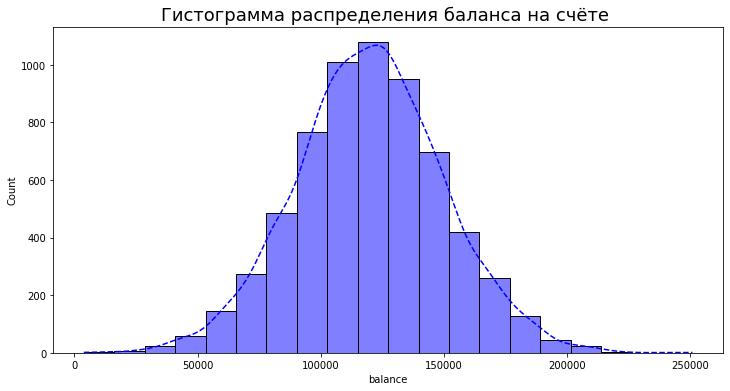

In [9]:
# построим гистограмму распределения баланса на счёте.
plt.figure(figsize=(12, 6))
plt.title('Гистограмма распределения баланса на счёте ', fontsize=18)
sns.histplot(df['balance'], bins=20, color = 'blue', alpha = 0.5, kde=True, line_kws = {'color':'blue','linestyle': 'dashed'});

<span style='color:#89AC76'><b>Примечание:</b></span><br>Выбросы отсутствуют, данные распределены вполне равномерно.

In [10]:
# проверим распределение пропусков balance в разрезе по городам.
df.groupby('city')['balance'].apply(lambda x: x.isna().sum())

city
Ростов Великий       0
Рыбинск           1199
Ярославль         2418
Name: balance, dtype: int64

<span style='color:#89AC76'><b>Примечание:</b></span><br>В Ростове Великом пропуски отсутствуют, что нельзя сказать о Рыбинске(1199) и Ярославле(2418).

In [11]:
# проверим распределение пропусков balance в разрезе по категории ушел клиент(1) или нет(0).
df.groupby('churn')['balance'].apply(lambda x: x.isna().sum())

churn
0    3117
1     500
Name: balance, dtype: int64

<span style='color:#89AC76'><b>Примечание:</b></span><br>
Большинство клиентов с пропусками в категории balance остаются клиентами банка,но 500 клиентов все же уходят.

In [12]:
# проверим распределение пропусков balance в разрезе по категории наличия кредитной карты.
df.groupby('credit_card')['balance'].apply(lambda x: x.isna().sum())

credit_card
0    1025
1    2592
Name: balance, dtype: int64

<span style='color:#89AC76'><b>Примечание:</b></span><br>Большинство клиентов(2592) с пропусками в категории balance имеют кредитную карту.

In [13]:
# проверим распределение пропусков balance в разрезе по категории количество используемых продуктов.
df.groupby('products')['balance'].apply(lambda x: x.isna().sum())

products
1     905
2    2600
3      98
4      14
Name: balance, dtype: int64

<span style='color:#89AC76'><b>Примечание:</b></span><br>Большинство клиентов(2600) с пропусками в категории balance пользуются 2 продуктами.

In [14]:
# проверим распределение пропусков balance в разрезе по категории активности клиента.
df.groupby('loyalty')['balance'].apply(lambda x: x.isna().sum())

loyalty
0    1744
1    1873
Name: balance, dtype: int64

<span style='color:#89AC76'><b>Примечание:</b></span><br>По лояльности/нелояльности клиенты с пропусками в категории balance практически равны.

In [15]:
# проверим наличие дубликатов.
print('Кол-во дубликатов в датасете:', df.duplicated().sum())

Кол-во дубликатов в датасете: 0


In [16]:
# заменим значения 'Ж' на 0 и 'M' на 1.
df['gender'] = df['gender'].replace({'Ж':0, 'М':1})

In [17]:
# заменим значения 'Ярославль' на 0, 'Рыбинск' на 1 и 'Ростов Великий' на 2.
df['city_b'] = df['city'].replace({'Ярославль':0, 'Рыбинск':1, 'Ростов Великий':2})

In [18]:
# для создания фиктивных переменных для каждого города используем ф-ию get_dummies
df = pd.get_dummies(df)

In [19]:
df.head()

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_b,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,15677338,619,0,42,2,NaN,1,1,1,101348.88,1,0,0,0,1
1,15690047,608,0,41,1,83807.86,1,0,1,112542.58,0,1,0,1,0
2,15662040,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,0,1
3,15744090,699,0,39,1,NaN,2,0,0,93826.63,0,0,0,0,1
4,15780624,850,0,43,2,125510.82,1,1,1,79084.10,0,1,0,1,0


<span style='color:#00541F'><b>ВЫВОД ПО РАЗДЕЛУ:</b></span><br>
- Произведена замена названий столбцов на общепринятый стиль;
- Дубликаты в данных отсутствуют;
- Заменены значения поля gender с <b>'Ж'</b> на <b>0</b> и с <b>'М'</b> на <b>1</b>;
- В столбце *balance*  обнаружены многочисленные пропуски, составляющие <b>36.17%</b> от общего числа данных;
    - Данные *balance* распределены вполне равномерно, какие либо выбросы отсутствуют;
    - Пропущенные значения столбца *balance* отсутствуют в городе Ростов Великий;
    - Большинство клиентов (<b>3117</b>) с пропусками в столбце balance остаются клиентами банка;
    - Большинство клиентов (<b>2592</b>) с пропусками в столбце balance имеют кредитную карту;
    - Большинство клиентов (<b>2600</b>) с пропусками в столбце balance пользуются 2 продуктами;
    - По лояльности/нелояльности клиенты с пропусками в категории balance практически равны.

Можно выдвинуть предположение, что возникновение многочисленных пропусков в столбце *balance* несут технический характер. <br>В удалении или замене пропусков нет необходимости, ибо мы не имеем достаточно информации о происходящем и тем самым можем исказить общую картину дальнейшего анализа. Принято решение оставить всё, как есть.

## Шаг 3. Изучим и проверим данные. ##

In [20]:
# изучим описательную статистику числовых данных.
df.describe()

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_b,city_Ростов Великий,city_Рыбинск,city_Ярославль
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,0.545700,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700,0.749500,0.250900,0.247700,0.501400
std,7.193619e+04,96.653299,0.497932,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769,0.830433,0.433553,0.431698,0.500023
min,1.560844e+07,350.000000,0.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.567126e+07,584.000000,0.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.573347e+07,652.000000,1.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.579597e+07,718.000000,1.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000,2.000000,1.000000,0.000000,1.000000
max,1.585843e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,2.000000,1.000000,1.000000,1.000000


<span style='color:#89AC76'><b>Примечание:</b></span><br>
- Кредитный скоринг в среднем составляет 650 баллов, есть высокая вероятность получить одобрение по кредиту;
- Мужчин немного больше, чем женщин, но не критично;
- Возраст клиентов от 18 до 92 лет. Средний возраст клиента около 39 лет;
- В среднем клиент имеет в собственности 5 объектов;
- На своем счету в среднем клиент имеет около 120000 руб;
- В среднем используются 1 - 2 продукта;
- Средний клиент скорее всего имеет кредитную карту;
- Лояльность клиентов составляет чуть больше 50%;
- Средняя зарплата составляет 100000 руб;
- Средний отток составляет порядка 20 %.


### Распределение количественных признаков. ###

In [21]:
# ф-ия распределения количественных признаков.
def quan_tables(data):
    for column in ['score', 'age', 'balance', 'estimated_salary']:
            plt.figure(figsize=(15, 5))
            sns.histplot(data=data, x=column, color='#6A5ACD');
            plt.title(f'Распределение клиентов по признаку: {column}', fontsize = 15)
            plt.ylabel('Кол-во клиентов')
            plt.show()

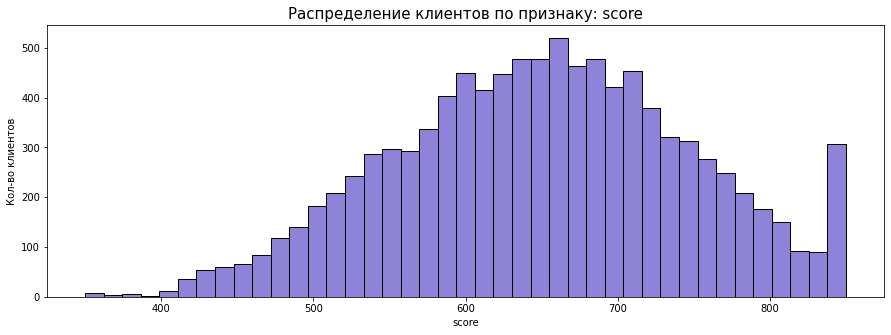

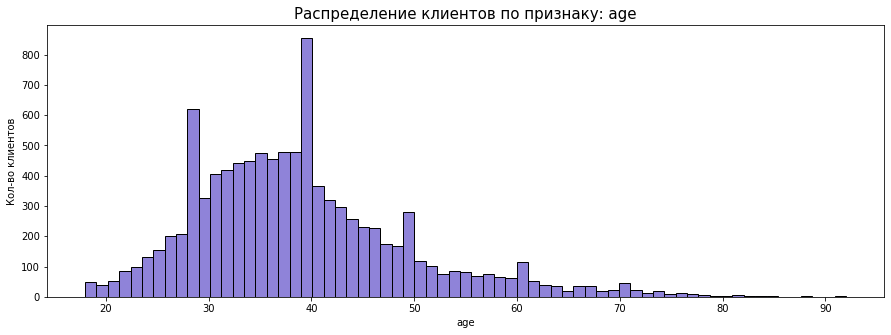

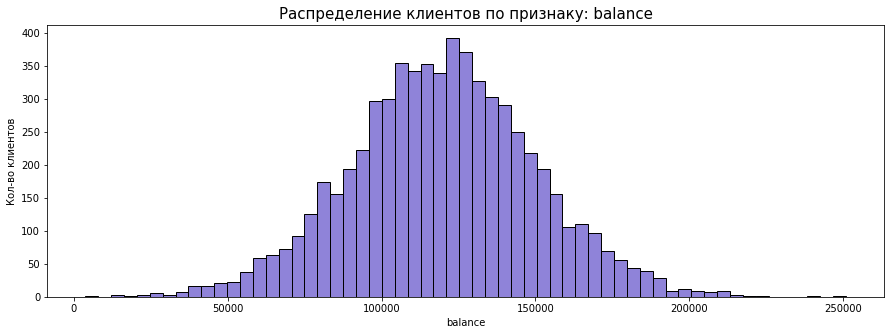

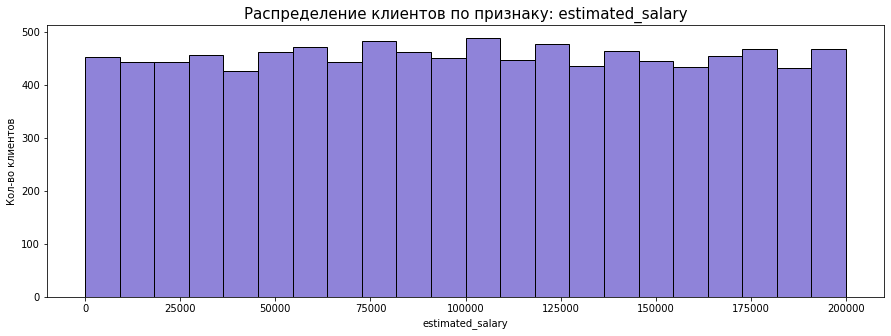

In [22]:
quan_tables(df)

<span style='color:#89AC76'><b>Примечание:</b></span><br>
- Наблюдается небольшой всплеск распределения кредитного скоринга на значении 830. Смею предположить, что причиной данной аномалии является обрезка данных на значении 850. Возможно изначально имелись клиенты с более высоким рейтингом;
- Заработная плата распределена однородно, наблюдается некое плато на протяжении всей гистограммы. Средняя заработная плата исходя из данных описательной статистики составляет 100000 руб;
- Остальные признаки распределены нормально;

### Распределение категориальных и дискретных признаков. ###

In [23]:
# ф-ия распределения категориальных признаков.
def cat_tables(data):
    for column in ['city_b', 'gender', 'objects', 'products', 'credit_card', 'loyalty', 'churn']:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(data=data, x=column, palette = 'Set2');
        plt.title(f'Распределение клиентов по признаку: {column}', fontsize = 15)
        plt.ylabel('Кол-во клиентов')
        plt.grid(True, axis='y', linestyle='--')
        plt.show()

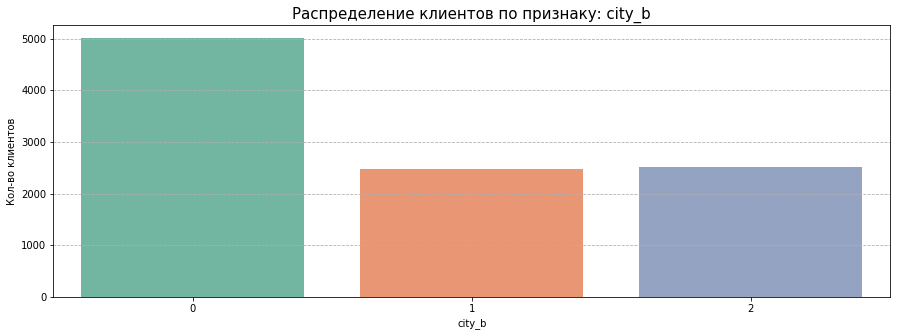

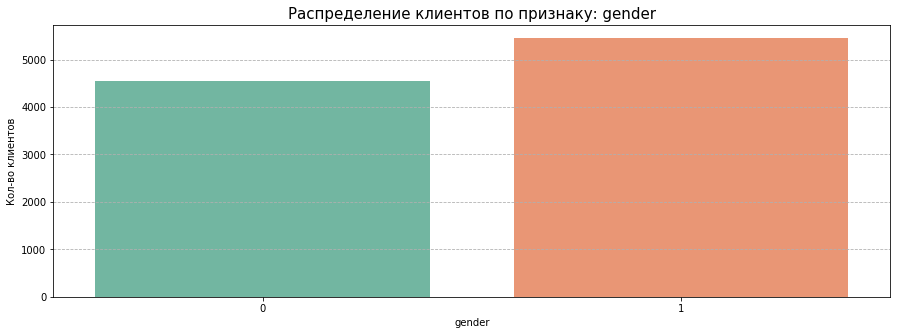

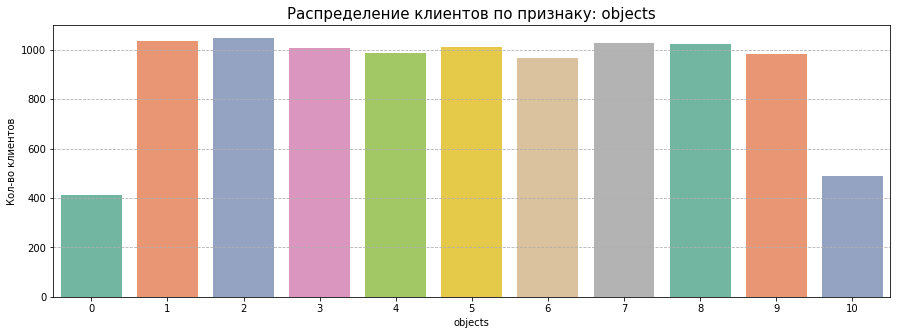

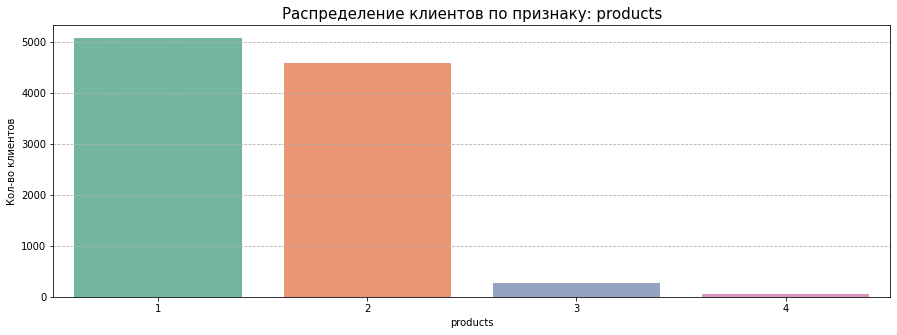

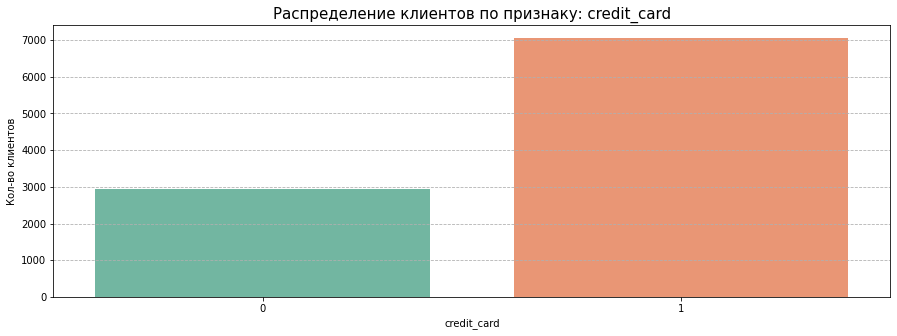

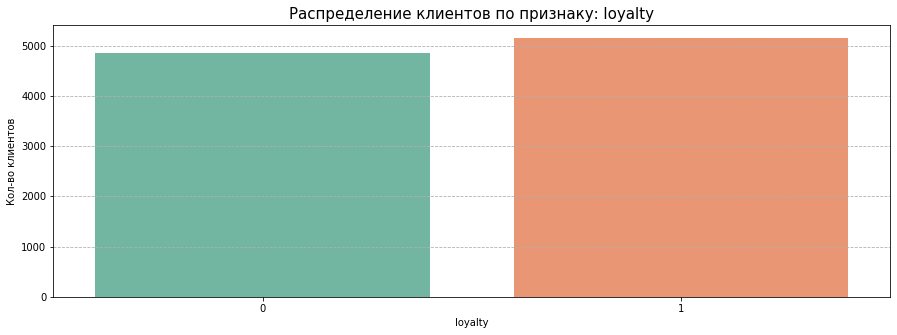

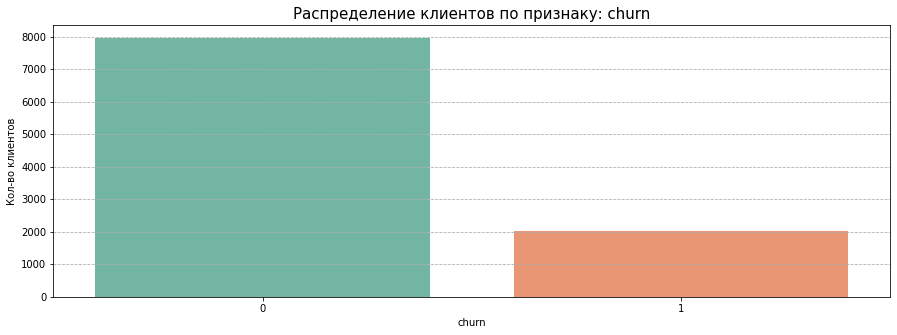

In [24]:
cat_tables(df)

<span style='color:#89AC76'><b>Примечание:</b></span><br>
- Большая часть клиентов из Ярославля. В Рыбинске и Ростове Великом приблизительно одинаковое кол-во клиентов;
- По соотношению полов, мужчин чуть больше, чем женщин (приблизительно на 10%);
- Распределение по кол-ву объектов собственности практически однородно (от 1 до 9 объектами, владеют 1000 человек в каждой группе). Так присутствуют те у кого 0 объектов (приблизительно 400 человек) и у кого 10 объектов (приблизительно 500 человек);
- Большинство клиентов пользуются 1 или 2 продуктами. Есть незначительные показатели клиентов с 3 продуктами и выше;
- Средний балл кредитного скоринга составляет 650;
- Чуть больше 70% клиентов пользуются кредитными картами;
- Лояльность составляет приблизительно 53%;
- Отток клиентов около 21%.

### Матрица корреляции. ###

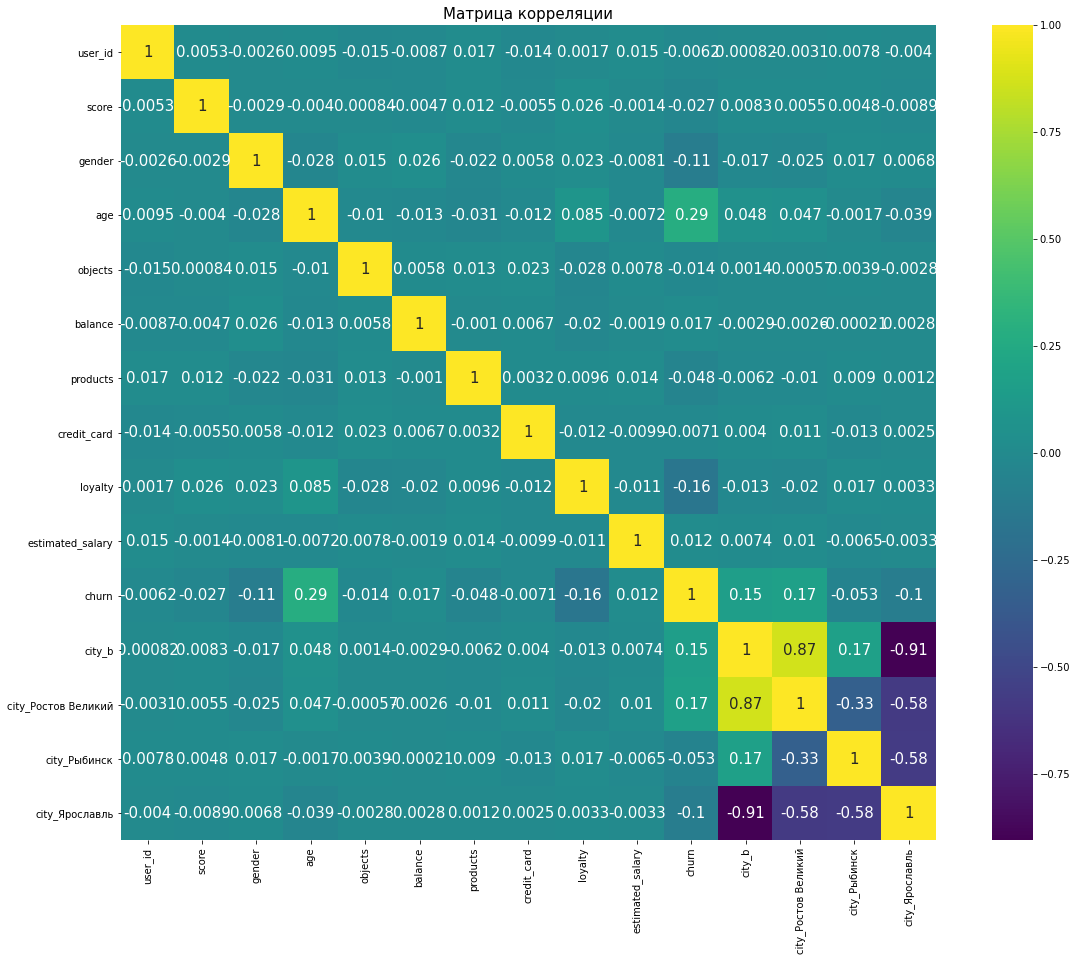

In [25]:
# построим матрицу корреляции.
correlation_matrix=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, square=True,  cmap='viridis', annot_kws = {'size':15})
plt.title('Матрица корреляции', fontsize = 15)
plt.show()

<span style='color:#89AC76'><b>Примечание:</b></span><br>
- Согласно шкале Чеддока присутствует слабая корреляция оттока с возрастом, балансом на счёте и городом Ростов Великий;
- В общем и целом признаки слабо коррелируют между собой, максимальный показатель - 29%. <br>Можно предположить, что чем старше становится клиент, тем больше возрастает его склонность к оттоку.

<span style='color:#00541F'><b>ВЫВОД ПО РАЗДЕЛУ:</b></span><br>

В ходе исследовательского анализа данных, были посчитаны средние и стандартные отклонения, построены гистограммы распределения и матрица корреляции. Стоит отметить странную однородность в распределении заработной платы и объектов собственности клиента, а так же небольшой всплеск в кредитном скоринге. Есть вероятность, что данные особенности обусловлены специфичностью выборки.

На основании полученных данных мы можем сделать вывод:

- Самый большой филиал находится в Ярославле (около <b>5000</b> клиентов);
- В Рыбинске и Ростове Великом практически в два раза меньше и поровну (приблизительно по <b>2500</b> клиентов);
- Присутствует <b>10%</b> перевес в сторону мужчин;
- Средний возраст клиента составляет <b>39</b> лет;
- Cредний остаток на балансе <b>120000</b> рублей;
- Cредний доход в <b>100000</b> рублей;
- В основном используется <b>1-2</b> продукта;
- Средний бал кредитного скоринга - <b>650</b>;
- В <b>70%</b> случаев это кредитная карта; 
- Клиент скорее лояльный, чем нет; 
- Вероятность ухода составляет <b>21%</b>.

## Шаг 4. Выведение портретов клиентов, которые склонны  и не склонны к оттоку. ## 

In [26]:
# таблица распределения признаков по городам и оттоку
city_by_churn=df.groupby(['city_b', 'churn']).mean().T
city_by_churn=city_by_churn.iloc[1:]
city_by_churn

city_b                           0                             1  \
churn                            0              1              0   
score                   651.162226     641.914815     652.104167   
gender                    0.571598       0.432099       0.584302   
age                      37.235966      45.133333      37.839147   
objects                   5.005471       5.000000       5.107558   
balance              119484.839826  121915.781268  119820.561722   
products                  1.541389       1.476543       1.544574   
credit_card               0.707422       0.702469       0.699128   
loyalty                   0.545433       0.367901       0.567345   
estimated_salary      99217.097331  103439.278296   98602.369864   
city_Ростов Великий       0.000000       0.000000       0.000000   
city_Рыбинск              0.000000       0.000000       1.000000   
city_Ярославль            1.000000       1.000000       0.000000   

city_b                                          2                 
churn                            1              0              1  
score                   647.484262     653.261357     647.689189  
gender                    0.440678       0.560472       0.449631  
age                      44.147700      37.311504      44.894349  
objects                   4.656174       5.011799       5.006143  
balance              119792.058240  119427.106696  120361.075590  
products                  1.513317       1.551032       1.454545  
credit_card               0.673123       0.716224       0.708845  
loyalty                   0.341404       0.561652       0.363636  
estimated_salary     103629.554818  102414.657876   98403.886450  
city_Ростов Великий       0.000000       1.000000       1.000000  
city_Рыбинск              1.000000       0.000000       0.000000  
city_Ярославль            0.000000       0.000000       0.000000

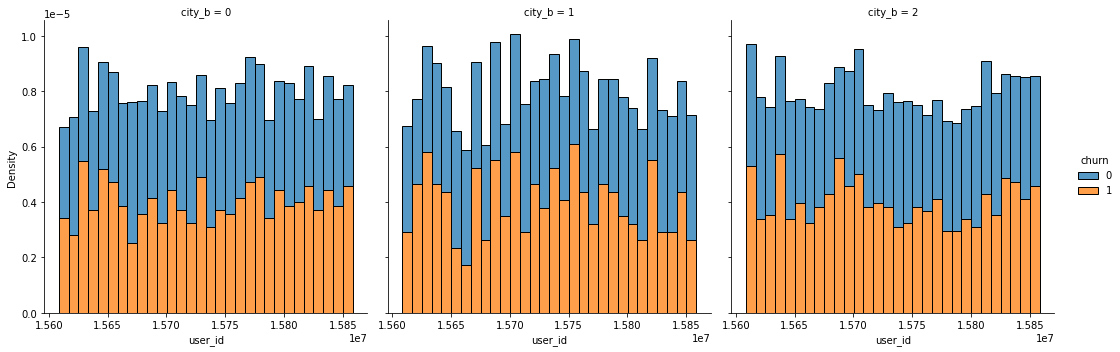

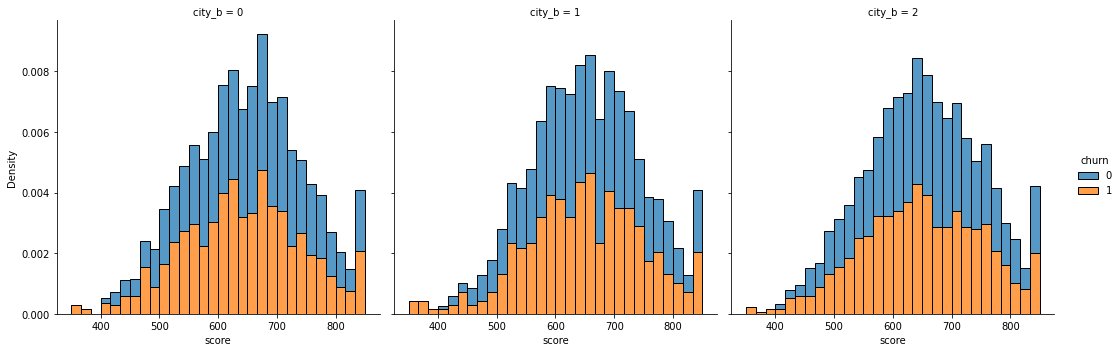

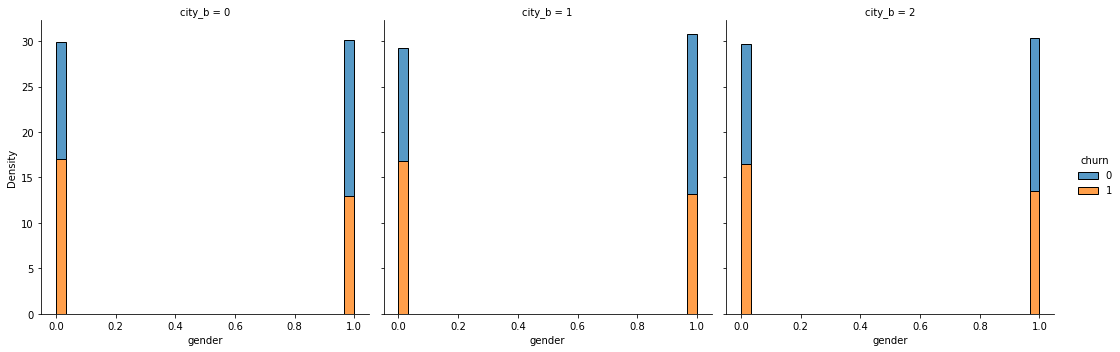

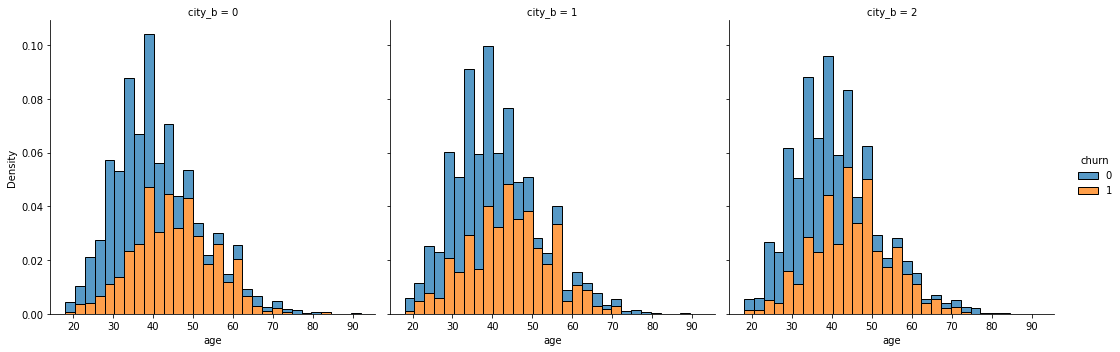

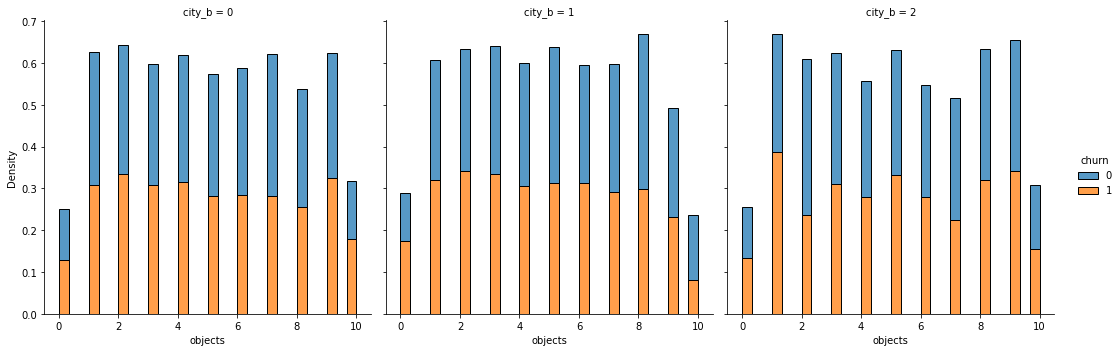

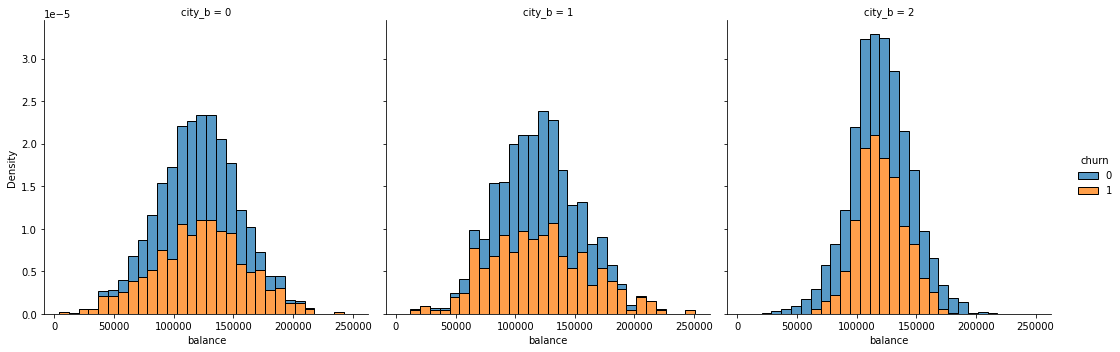

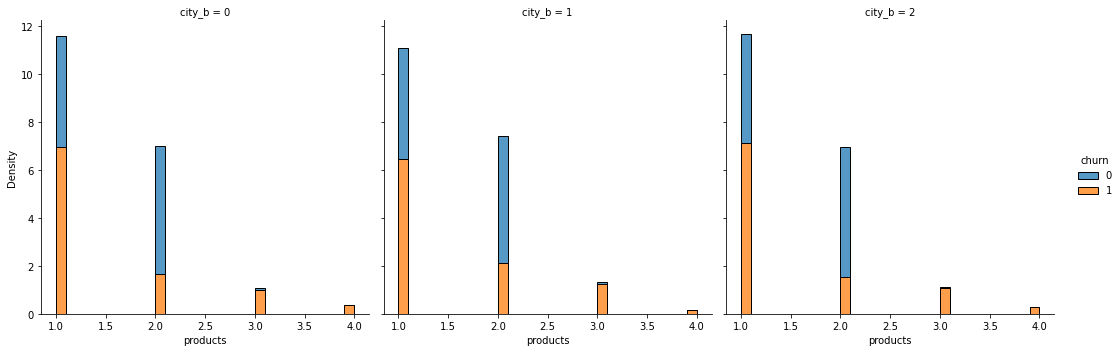

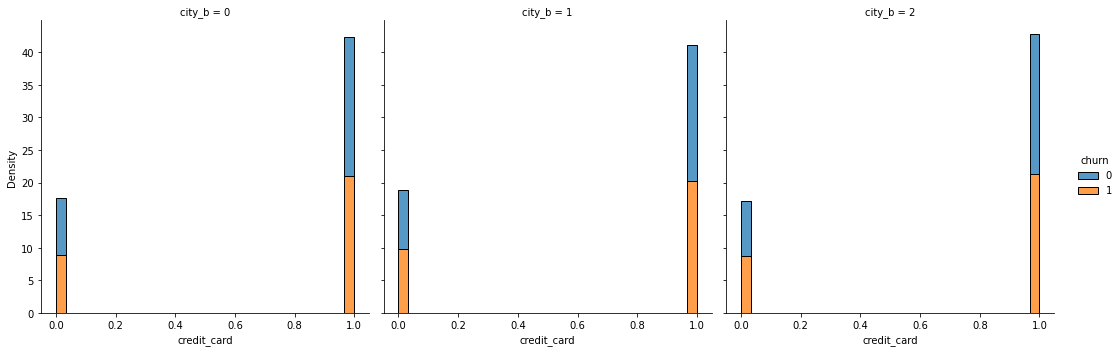

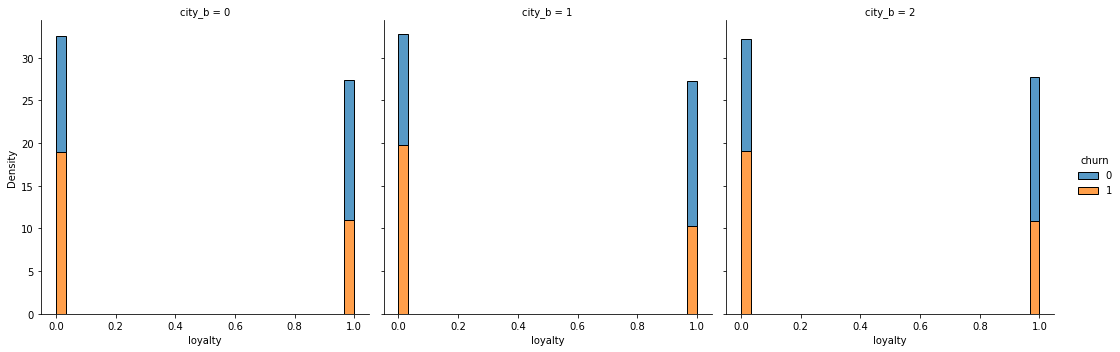

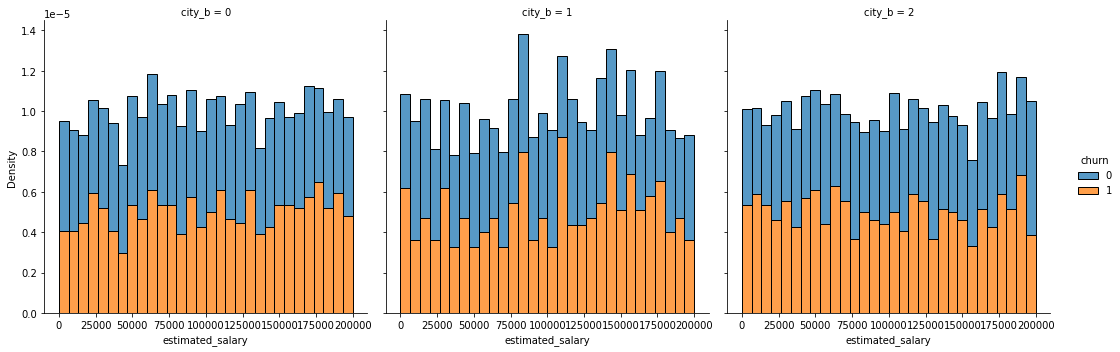

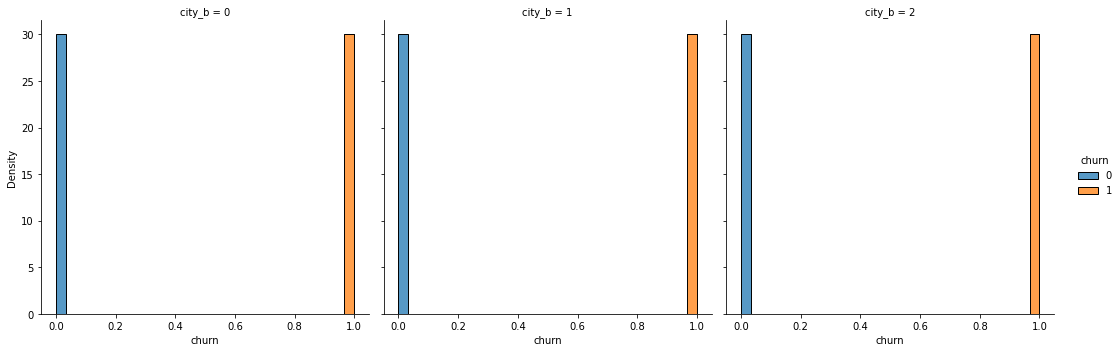

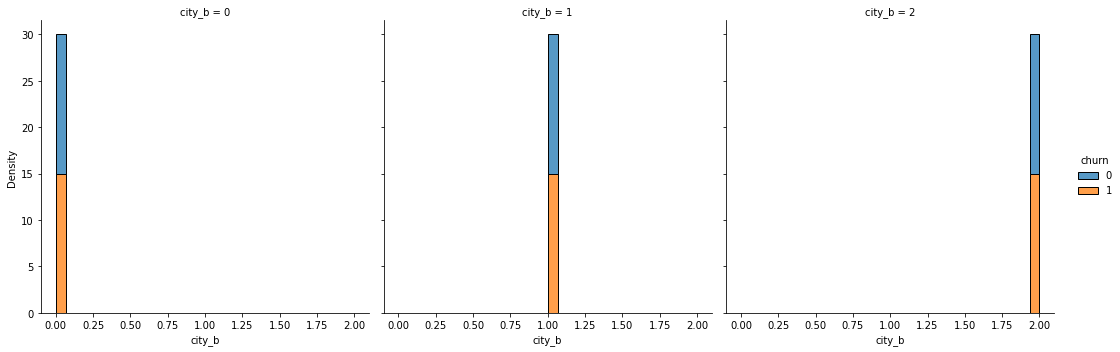

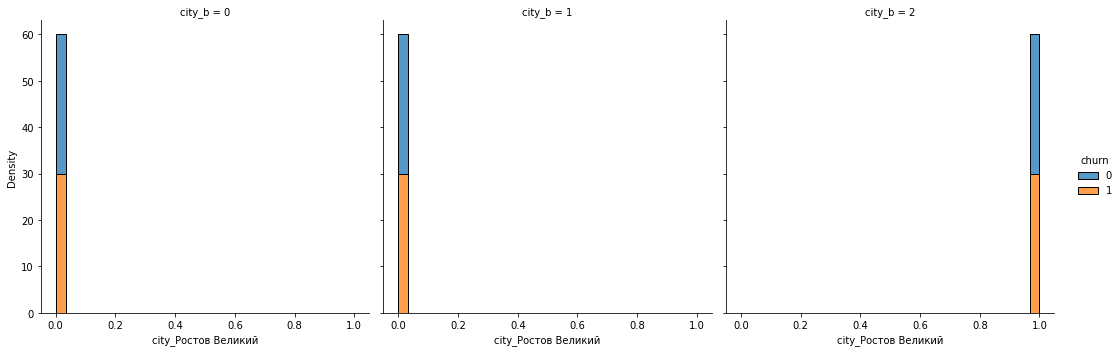

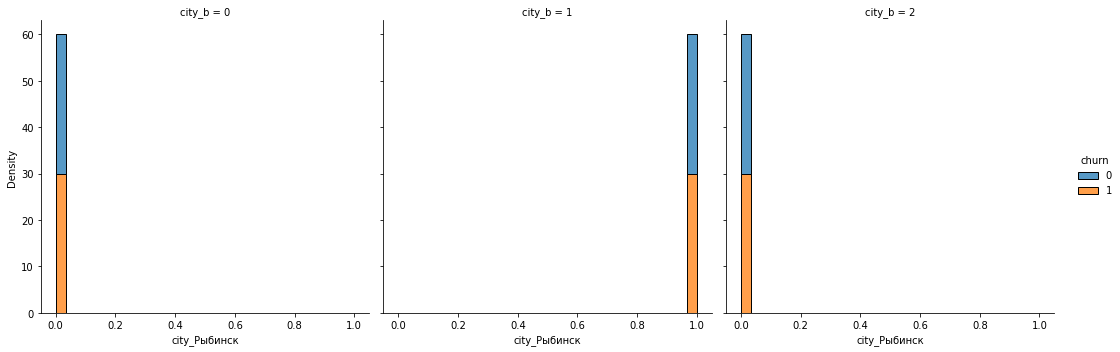

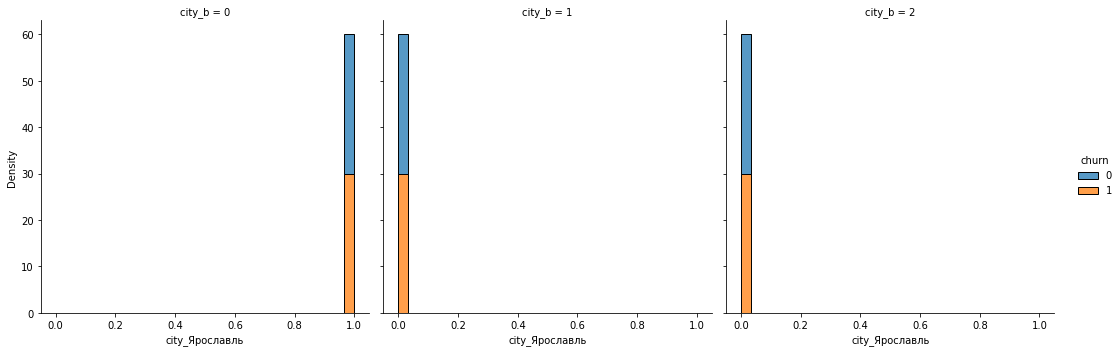

In [27]:
# построим распределение признаков по каждому городу и оттоку клиентов.
for i in df.columns:
    sns.displot(data=df, x=i, bins=30, col='city_b', hue='churn', stat='density', multiple='stack', common_norm=False)

<span style='color:#00541F'><b>ВЫВОД ПО РАЗДЕЛУ:</b></span><br>

<span style='color:#9B2D30'>Портрет клиента из Ярославля склонного к оттоку:</span>
- Возраст <b>40-60</b> лет;
- Остаток на балансе <b>100000 - 150000</b> рублей;
- Наличие кредитной карты;
- Средняя заработная плата <b>103000</b> рублей;
- Больше вероятно, что это будет женщина, чем мужчина;
- Объекты собственности - в среднем <b>5</b> шт;
- Использование <b>1</b>-<b>2</b> продуктов;
- Кредитный скоринг <b>580 - 690</b>.

<span style='color:#00541F'>Портрет клиента из Ярославля склонного остаться с банком:</span>
- Возраст <b>30-45</b> лет;
- Остаток на балансе <b>110000 - 130000</b> рублей;
- Наличие кредитной карты;
- Средняя заработная плата <b>99000</b> рублей;
- Больше вероятно, что это будет мужчина, чем женщина;
- Объекты собственности - в среднем <b>5</b> шт;
- Использование <b>1</b>-<b>2</b> продуктов;
- Кредитный скоринг <b>600 - 700</b>.

<span style='color:#9B2D30'>Портрет клиента из Рыбинска склонного к оттоку:</span>
- Возраст <b>40-55</b> года;
- Остаток на балансе <b>70000 - 120000</b> рублей;
- Наличие кредитной карты;
- Средняя заработная плата <b>103000</b> рублей;
- Больше вероятно, что это будет женщина, чем мужчина;;
- Объекты собственности - в среднем <b>4</b> шт;
- Использование <b>1</b>-<b>2</b> продуктов;
- Кредитный скоринг <b>590 - 680</b>.

<span style='color:#00541F'>Портрет клиента из Рыбинска склонного остаться с банком:</span>
- Возраст <b>28-45</b> лет;
- Остаток на балансе <b>70000 - 130000</b> рублей;
- Наличие кредитной карты;
- Средняя заработная плата <b>98000</b> рублей;
- Больше вероятно, что это будет мужчина, чем женщина;
- Объекты собственности - в среднем <b>5</b> шт;
- Использование <b>1</b>-<b>2</b> продуктов;
- Кредитный скоринг <b>550 - 700</b>.

<span style='color:#9B2D30'>Портрет клиента из Ростова Великого склонного к оттоку:</span>
- Возраст <b>40-55</b> года;
- Остаток на балансе <b>100000 - 120000</b> рублей;
- Наличие кредитной карты;
- Средняя заработная плата <b>98000</b> рублей;
- Больше вероятно, что это будет женщина, чем мужчина.
- Объекты собственности - в среднем <b>5</b> шт;
- Использование <b>1</b>-<b>2</b> продуктов;
- Кредитный скоринг <b>580 - 640</b>.

<span style='color:#00541F'>Портрет клиента из Ростова Великого склонного остаться с банком:</span>
- Возраст <b>30-45</b> лет;
- Остаток на балансе <b>100000 - 130000</b> рублей;
- Наличие кредитной карты;
- Средняя заработная плата <b>102000</b> рублей;
- Больше вероятно, что это будет мужчина, чем женщина;
- Объекты собственности - в среднем <b>5</b> шт;
- Использование <b>1</b>-<b>2</b> продуктов;
- Кредитный скоринг <b>550 - 740</b>.





## Шаг 5. Проверка гипотез. ##

### Различие дохода между теми клиентами, которые ушли и теми,которые остались. ###

Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

Сформулируем гипотезы:

- H0: Средняя заработная плата между оставшимися и ушедшими клиентами банка равна;
- H1: Средняя заработная плата между оставшимися и ушедшими клиентами банка отличается.

In [28]:
# доходы клиентов, которые остались.
selection_0 = df.query('churn==0')

# доходы клиентов, которые ушли.
selection_1 = df.query('churn==1')


In [29]:
# размер выборок.
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

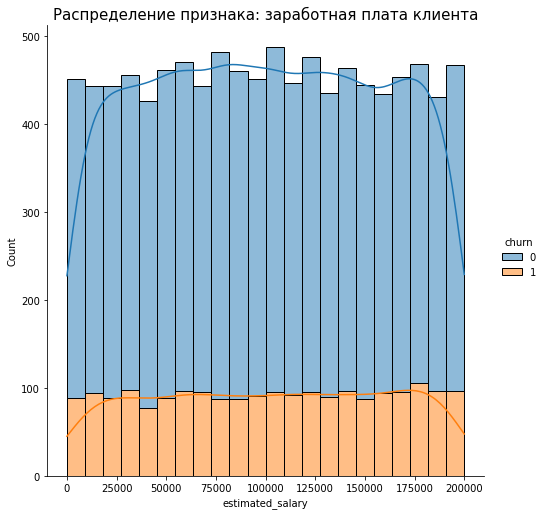

In [30]:
# еще раз посмотрим на распределение заработной платы.
sns.displot(data=df,x='estimated_salary', hue='churn', height=7, aspect=1, kde=True, multiple='stack')
plt.title('Распределение признака: заработная плата клиента',fontsize=15)
plt.show()

In [31]:
# выведем дисперсии выборок.
print('Дисперсия оставшихся:',selection_0['estimated_salary'].var().round(2))
print('Дисперсия ушедших:',selection_1['estimated_salary'].var().round(2))

Дисперсия оставшихся: 3295401414.92
Дисперсия ушедших: 3353848166.81


<span style='color:#89AC76'><b>Примечание:</b></span><br>
Присутствует небольшое различие дисперсий, принято решение использовать статистический U-критерий Манна — Уитни.

In [32]:
# критический уровень статистической значимости.
alpha = 0.05 

results = st.mannwhitneyu(
    selection_0['estimated_salary'], 
    selection_1['estimated_salary'])

# проверяем гипотезу о равенстве медиан двух независимых совокупностей.
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.22705150930153783
Не получилось отвергнуть нулевую гипотезу


<span style='color:#89AC76'><b>Примечание:</b></span><br>
Нулевая гипотеза не отвергнута, статистических различий средней заработной платы клиентов которые ушли / остались не наблюдается.

### Различие возраста между теми клиентами, которые ушли и теми, которые остались. ###

Проверим гипотезу различия возраста между теми клиентами, которые ушли и теми, которые остались.

Сформулируем гипотезы:

- H0: Средний возраст оставшихся и ушедших клиентов банка равен;
- H1: Средний возраст оставшихся и ушедших клиентов банка отличается.

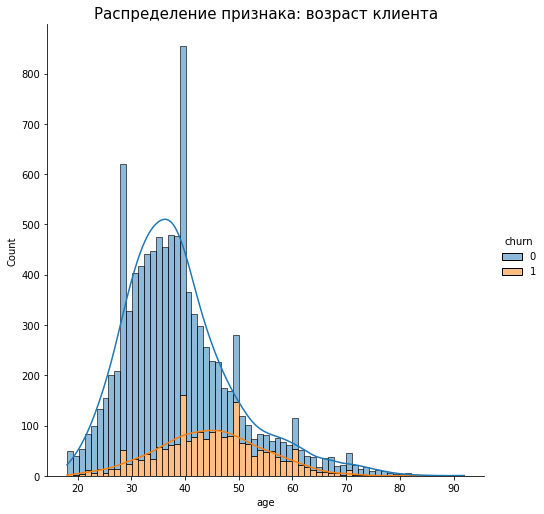

In [33]:
# еще раз посмотрим на распределение возраста клиента.
sns.displot(data=df,x='age', hue='churn', height=7, aspect=1, kde=True, multiple='stack')
plt.title('Распределение признака: возраст клиента',fontsize=15)
plt.show()

In [34]:
# выведем дисперсии выборок.
print('Дисперсия оставшихся:',selection_0['age'].var().round(2))
print('Дисперсия ушедших:',selection_1['age'].var().round(2))

Дисперсия оставшихся: 102.52
Дисперсия ушедших: 95.29


<span style='color:#89AC76'><b>Примечание:</b></span><br>
Присутствует небольшое различие дисперсий, анологично, что в и первой гипотезе, используем U-критерий Манна — Уитни.

In [35]:
# критический уровень статистической значимости.
alpha = 0.05 

results = st.mannwhitneyu(
    selection_0['age'], 
    selection_1['age'])

# проверяем гипотезу о равенстве медиан двух независимых совокупностей.
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.2104014319371675e-230
Отвергаем нулевую гипотезу


<span style='color:#89AC76'><b>Примечание:</b></span><br>
Нулевая гипотеза отвергнута, наблюдаются статистические различия среднего возраста клиентов которые ушли / остались.

### Различие кредитного скоринга между теми клиентами, которые ушли и теми, которые остались. ###

Проверим гипотезу различия кредитного скоринга между теми клиентами, которые ушли и теми, которые остались.

Сформулируем гипотезы:

- H0: Среднее значение кредитного скоринга оставшихся и ушедших клиентов банка равно;
- H1: Среднее значение кредитного скоринга оставшихся и ушедших клиентов банка отличается.

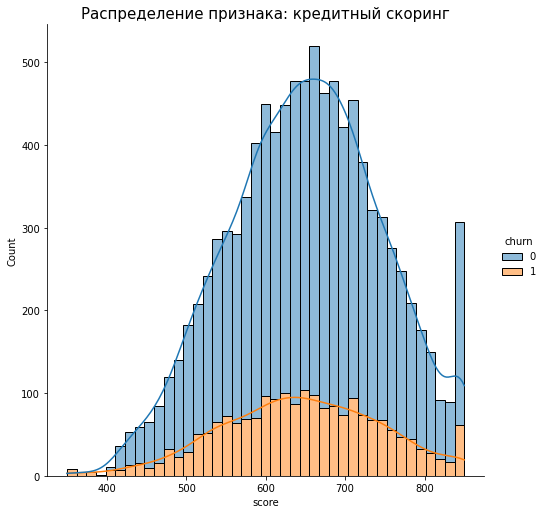

In [36]:
# еще раз посмотрим на распределение кредитного скоринга.
sns.displot(data=df,x='score', hue='churn', height=7, aspect=1, kde=True, multiple='stack')
plt.title('Распределение признака: кредитный скоринг',fontsize=15)
plt.show()

In [37]:
# выведем дисперсии выборок.
print('Дисперсия оставшихся:',selection_0['score'].var().round(2))
print('Дисперсия ушедших:',selection_1['score'].var().round(2))

Дисперсия оставшихся: 9149.66
Дисперсия ушедших: 10064.4


<span style='color:#89AC76'><b>Примечание:</b></span><br>
Присутствует различие дисперсий приблизительно 10%, анологично, что в предыдущих гипотезах, используем U-критерий Манна — Уитни.

In [38]:
# критический уровень статистической значимости.
alpha = 0.05 

results = st.mannwhitneyu(
    selection_0['score'], 
    selection_1['score'])

# проверяем гипотезу о равенстве медиан двух независимых совокупностей.
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.01986866117272834
Отвергаем нулевую гипотезу


<span style='color:#89AC76'><b>Примечание:</b></span><br>
Нулевая гипотеза отвергнута, наблюдаются статистические различия среднего кредитного скоринга клиентов которые ушли / остались.

<span style='color:#00541F'><b>ВЫВОД ПО РАЗДЕЛУ:</b></span><br>

Были проверены следующие гипотезы:
- Равенство доходов клиентов которые ушли в отток / остались. Нулевая гипотеза <b>подтвердилась</b>;
- Равенство возраста клиентов которые ушли в отток / остались. Нулевая гипотеза была <b>отвергнута</b>;
- Равенство кредитного скоринга клиентов которые ушли в отток / остались. Нулевая гипотеза была <b>отвергнута</b>.

## Общий вывод и рекомендации. ##

<span style='color:#00541F'><b>ОБЩИЙ ВЫВОД:</b></span><br>

- В имеющихся данных содержится информация о <b>10000</b> уникальных клиентах банка из Ярославля, Рыбинска и Ростова Великого;
- Самый большой филиал находится в Ярославле (<b>5000</b> клиентов), в Рыбинске и Ростове Великом равное количество клиентов;
- Гендерный состав в приблизительно в размере <b>10%</b> перевешивает в сторону мужского пола;
- Возраст клиентов варьируется от <b>18</b> до <b>92</b> лет, средний возраст клиента составляет <b>39</b> лет;
- Остаток на балансе варьируется от <b>3768</b> до <b>250898</b> рублей, средний остаток на балансе составляет <b>120000</b> рублей;
- Средняя заработная плата клиента составляет <b>100000</b> рублей;
- Клиенты пользуются от <b>1</b> до <b>4</b> продуктов банка, чаще <b>1-2</b>-мя продуктами;
- Кредитная карта есть у <b>70%</b> клиентов;
- Количество лояльных клиентов составляет приблизительно <b>53%</b> от выборки;
- Количество склонных к оттоку клиентов составляет <b>21%</b> от выборки.
- Согласно матрице корреляции, мы имеем очень слабую связь между признаками.<br>Тем не менее мы делаем предположение, что чем старше становится клиентом, тем его склонность к оттоку возрастает;
- В процентном соотношении по городам, больше всего отток происходит в Ростове Великом, меньше всего в Ярославе;
- Кредитный скоринг не имеет значительной взаимосвязи с оттоком клиентов, <br>более того он практически равен между группами ушедших и оставшихся клиентов; 
- Клиенты - женщины чуть больше склонны к оттоку, нежели клиенты - мужчины;
- Клиенты в возрасте <b>40</b> - <b>60</b> лет более склонны уходить, нежели клиенты более младшего возраста;
- Отток среди клиентов с <b>3-4</b> продуктами в процентном соотношении выше(данные клиенты уходят практически все),<br> чем среди клиентов с <b>1-2</b> продуктами;
- Количество объектов собственности и заработная плата не имеет значительную взаимосвязь с оттоком клиентов;
- Лояльные клиенты склонны уходить меньше, чем не лояльные;
- Были проверены следующие гипотезы:
    - Равенство доходов клиентов которые ушли в отток / остались. Нулевая гипотеза <b>подтвердилась</b>;
    - Равенство возраста клиентов которые ушли в отток / остались. Нулевая гипотеза была <b>отвергнута</b>;
    - Равенство кредитного скоринга клиентов которые ушли в отток / остались. Нулевая гипотеза была <b>отвергнута</b>.

<span style='color:#00541F'><b>В результате полученных выводов, можно сделать заключение о портрете клиента:</b></span><br></b>

<span style='color:#9B2D30'><b>Клиент склонный уходить в отток:</b></span>
- Пользователи проживающие в городе <b>Ростов Великий</b>;
- Пользователи <b>женского</b> пола;
- Пользователи в возрасте от <b>40</b> до <b>60</b> лет и выше;
- Пользователи пользующиеся <b>3-4</b> продуктами банка;
- Пользователи с <b>низким</b> уровнем лояльности.

<span style='color:#00541F'><b>Клиент склонный остаться с банком:</b></span>
- Пользователи проживающие в городе <b>Рыбинск</b>;
- Пользователи <b>мужского</b> пола;
- Пользователи в возрасте от <b>25</b> до <b>40</b> лет;
- Пользователи пользующиеся <b>1-2</b> продуктами банка;
- Пользователи с <b>высоким</b> уровнем лояльности.

<span style='color:#00541F'><b>РЕКОМЕНДАЦИИ:</b></span><br>

- Предложения о вкладе с повышенной процентной ставкой, с акцентом на предпенсионную категорию граждан;
- Клиентов с 1-2 продуктами необходимо увлечь своего рода спецпредложениями льготного кредитования, подарочными инвестиционными активами и т.д, для клиентов с 3-4 продуктами, необходимо сделать тоже самое, только расширить список предложений и сделать их еще более выгодными. Например добавить льготную ипотеку для данной категории клиентов.
- Повышение лояльности пользователей за счёт создания удобных и простых сервисов для пользования банковскими услугами;
- Следует изучить обстоятельства в городе Ростов Великий и заинтересовать предложениями, которые свойственны только данному городу;
- С учетом приличного дохода у женщин, которые попадают в отток, можно предложить особенные кредитные условия для женщин-предпринимателей;
- Возможно стоит заключить контракт с несколькими магазинами-партнерами, которые безусловно заинтересуют часть женщин. Добавить бонус в виде кэшбэка при оплата картой банка Метанпром. 


## Презентация. ##

<span style='color:#4285B4'><b>ССЫЛКА НА ПРЕЗЕНТАЦИЮ:</b></span> https://drive.google.com/file/d/1Tfzzqd_NEHnZF0ZK53vGiA6Gba8ua-Wu/view?usp=share_link

<span style='color:#4285B4'><b>ССЫЛКА НА ДАШБОРД:</b></span> https://public.tableau.com/app/profile/alexander4262/viz/final_project_bank_16775122612180/main_sheet